# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

> Project summary

# 1: Import libraries, data & cleaning

# 2: How age influence love ? 

# 3: How race influence love ?

# 4: Conclusion

# 1: Import libraries, data & cleaning

In [63]:
### Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot

In [64]:
# read dataset
df = pd.read_csv("Speed.csv", encoding = "ISO-8859-1")

In [65]:
# Display maximum columns
pd.set_option("display.max_columns", None)                     
pd.get_option("display.max_columns")

In [66]:
# Display usefull informations
display(df.head())
print()
print(df.info())
print()
display(df.describe(include='all'))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,dec,like,prob,met,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1,7.0,6.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1,7.0,5.0,1.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1,7.0,NaN,1.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1,7.0,6.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1,6.0,6.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   int64  
 1   id        8377 non-null   float64
 2   gender    8378 non-null   int64  
 3   idg       8378 non-null   int64  
 4   condtn    8378 non-null   int64  
 5   wave      8378 non-null   int64  
 6   round     8378 non-null   int64  
 7   position  8378 non-null   int64  
 8   positin1  6532 non-null   float64
 9   order     8378 non-null   int64  
 10  partner   8378 non-null   int64  
 11  pid       8368 non-null   float64
 12  match     8378 non-null   int64  
 13  int_corr  8220 non-null   float64
 14  samerace  8378 non-null   int64  
 15  age_o     8274 non-null   float64
 16  race_o    8305 non-null   float64
 17  like_o    8128 non-null   float64
 18  prob_o    8060 non-null   float64
 19  met_o     7993 non-null   float64
 20  age       8283 non-null   flo

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,dec,like,prob,met,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8378.000000,8138.000000,8069.000000,8003.000000,7205.000000,7463.000000,7463.000000,7433.000000,3974.000000,3974.000000,3974.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN,NaN,NaN,NaN,New York,0,"55,080.00",NaN,NaN,NaN,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,NaN,NaN,NaN,522,355,124,NaN,NaN,NaN,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,6.134498,5.208251,1.960215,26.358928,NaN,7.662488,2.757186,3.784793,3.651645,NaN,NaN,NaN,2.122063,5.006762,2.158091,NaN,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,5.570556,0.419909,6.134087,5.207523,0.948769,3.207814,5.711510,1.843495,2.338087,0.780825,0.981631,0.376950
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,1.841258,2.129354,0.245925,3.566763,NaN,3.758935,1.230905,2.845708,2.805237,NaN,NaN,NaN,1.407181,1.444531,1.105246,NaN,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,4.762569,0.493573,1.841285,2.129565,0.989889,2.444813,1.820764,0.975662,0.631240,1.611694,1.382139,0.484683
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,1.000000,18.000000,NaN,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,4.000000,154.000000,0.000000,-0.020000,0.000000,24.000000,2.000000,5.000000,4.000000,2.000000,24.000000,NaN,5.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,4.000000,1.000000,NaN,2.000000,4.000000,2.000000,5.000000,7.000000,6.00000

In [67]:
# Keep only the important columns
df=df[df.columns[df.columns.isin(['gender','race','race_o','like','age_o','age','date_3','match','dec','dec_o'])]]

<AxesSubplot:>

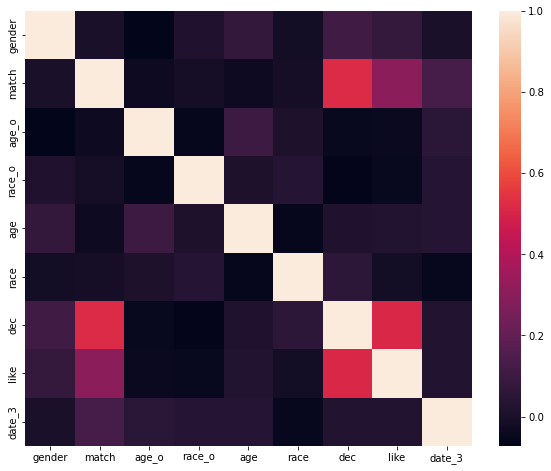

In [68]:
# display correlation heatmap
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax)

> It seems like matching with someone is only correlated with the partner decision and how much we like the partner just after the date.

In [69]:
# Find missing values in age and age_o columns
print(df.age.isna().value_counts())
print(df.age_o.isna().value_counts())
# Drop it
df = df[df['age'].notna()]
df = df[df['age_o'].notna()]

False    8283
True       95
Name: age, dtype: int64
False    8274
True      104
Name: age_o, dtype: int64


In [70]:
# Number of Female and Male
df.gender.value_counts()

0    4090
1    4090
Name: gender, dtype: int64

# Match analysis

In [71]:
# Create column "matchs" where 1 means match & 0 means next (no match) from match column
df['matchs'] = df.match.apply(lambda x: 'match' if x > 0 else 'next')

In [72]:
# Create ratio with the new matchs column
data_ratio = (df['matchs'].value_counts(normalize=True)*100).rename_axis('match').reset_index(name='counts')

In [73]:
# Display match proportion
fig = px.pie(data_ratio,
             values='counts',
             names='match', 
             color ='match',
             title='Proportion of match',
             width= 1000,
             color_discrete_map={'match':'purple',
                                 'next':'green'}
             )
fig.update_traces(textposition = 'outside', textfont_size = 15)             
fig.update_layout(title_x = 0.5, 
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  template = 'plotly_dark' )                
fig.show()

> The % of global match is low 

# 2: How age influence love ? 

In [ ]:
# Create column "sexe" where 1 means male & 0 means female from gender column
df['sexe'] = df.gender.apply(lambda x: 'male' if x > 0 else 'female')

In [76]:
# Display age distribution
fig = px.violin(df, 
             x="age",
             color = "sexe",
             title= "Age distribution"
             )

fig.update_layout(title_x = 0.5,
                  autosize = True,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  yaxis_title = 'age',
                  yaxis = {'visible': False},
                  template = 'plotly_dark'
                  )                              
fig.show()

> It seems the majority is between 23 and 28 years

In [77]:
# Display match ratio of habing second date by age according to the gender
fig = px.histogram(df, x="age",
                   y="match",
                   color= 'sexe',
                   title = 'Average of match by age according to the gender',
                   barmode ='group',
                   histfunc= 'avg',
                   )
fig.update_traces(textposition = 'outside', textfont_size = 15)                  
fig.update_layout(autosize = True,
                  title_x = 0.5,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  template = 'plotly_dark'
                  )
fig.update_xaxes(tickfont_size=15,tickmode='linear')                  
fig.show()

> It seems like the age have an influence on matching with someone. To have better understanding let's see the influence of age difference between daters.

In [78]:
## Create new colums with age difference between participants
df['age_dif'] = abs(df['age_o']-df['age'])

In [79]:
# Display age difference distribution
fig = px.violin(df, 
             x="age_dif",
             title= "Age difference distribution"
             )

fig.update_layout(title_x = 0.5,
                  autosize = True,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  yaxis_title = 'age',
                  yaxis = {'visible': False},
                  xaxis_title = 'age difference',
                  template = 'plotly_dark'
                  )                              
fig.show()

It seems majority of dates are between 1 to 5 years differences

In [80]:
# Display match average by age difference
fig = px.histogram(df, x="age_dif",
                   y="match",
                   title = 'Match average by age difference',
                   histfunc= 'avg'
                   )
fig.update_traces(textposition = 'outside', textfont_size = 15)                  
fig.update_layout(autosize = True,
                  title_x = 0.5,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  xaxis_title = 'age difference',
                  template = 'plotly_dark'
                  )
fig.update_xaxes(tickfont_size=15, tickmode='linear')                  
fig.show()

> Age difference seems to have influence on match

> Particular case for the 17 years gap with 50% match

In [81]:
# Create age categories for visibility
bins = [0, 1, 3, 6, 9, 32]
labels = ['Same age','2 to 3 years', '4 to 6 years', '7 to 9 years', '10 years and more']
df['age_dif_cat'] = pd.cut(df.age_dif,
                           bins=bins,  
                           labels = labels, 
                           include_lowest = True
                          )

In [82]:
# Display match average by age categories
fig = px.histogram(df, x="age_dif_cat",
                   y="match",
                   barmode='group',
                   histfunc = 'avg',
                   title = 'Match average by age categories'
                  )
fig.update_layout(autosize=True,
                  title_x = 0.5,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  template = 'plotly_dark',
                  xaxis_title = '',
                  xaxis={'categoryorder':'min descending'}
                 )
fig.update_yaxes(tickfont_size=15)
fig.show()

> the age difference seems to have influence on match

# 3: How race influence love ?

In [83]:
# Create function to replace numbers to "etnies"
def race_func(x):
    if x == 1.0:
        return 'Black'
    elif x == 2.0:
        return 'Caucasian'
    elif x == 3.0:
        return 'Latino'
    elif x == 4.0:
        return 'Asian'
    else: 
        return 'Native'

In [84]:
# Apply new function
df['etnies'] = df.race.apply(race_func)

In [105]:
# Display race distribution
fig = px.histogram(df, 
                x="etnies",
                color='sexe',
                title= "Number of people by their race and sexe",
                barmode ='group',
                text_auto=True
                )
fig.update_traces(textposition = 'outside', textfont_size = 15)
fig.update_layout(title_x = 0.5,
                  autosize = True,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  yaxis = {'visible': False},
                  xaxis_title = '',
                  template = 'plotly_dark'
                  )
fig.update_xaxes(tickfont_size=15, tickmode='linear', categoryorder = 'total descending')                               
fig.show()

The majority of the people are caucasian or asian races

In [86]:
# Display average of match according to the race/etnies and sexe
fig = px.histogram(df, x="etnies",
                   y="match",
                   color="sexe",
                   barmode ='group',
                   title = 'Average of match according to the etnies & sexe',
                   histfunc= 'avg'
                   )
fig.update_traces(textposition = 'outside', textfont_size = 15)                  
fig.update_layout(autosize = True,
                  title_x = 0.5,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  xaxis_title = '',
                  template = 'plotly_dark'
                  )
fig.update_xaxes(tickfont_size=15,tickmode='linear',categoryorder = 'total descending')                  
fig.show()

> It seems like few influence of race on getting second dates

> Nevertheless Asian male seems to have 10% chance to get a match compare to 20% with female black female

In [87]:
# Create column if same race 0, else different race 
df['same_race_yn'] = abs(df.race - df.race_o)
# Create column with race difference or not
df['same_race'] = df.same_race_yn.apply(lambda x: 'same race' if x == 0 else 'different race')

In [88]:
# Create ratio with the new same_race column
data_ratio_race_dif = (df['same_race'].value_counts(normalize=True)*100).rename_axis('ratio').reset_index(name='counts')

In [89]:
# Display race difference proportion
fig = px.pie(data_ratio_race_dif,
             values='counts',
             names='ratio', 
             color ='ratio',
             title='Proportion of speed date with different or identical race',
             width= 1000
             )
fig.update_traces(textposition = 'outside', textfont_size = 15)             
fig.update_layout(title_x = 0.5, 
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  template = 'plotly_dark' )                
fig.show()

> Majority of dates are with different race between subjects

In [90]:
# Display average of match according to the race/etnie
fig = px.histogram(df, x="same_race",
                   y="match",
                   title = 'Average of match according to the etnies',
                   histfunc= 'avg',
                   text_auto = True
                   )
fig.update_traces(textposition = 'outside', textfont_size = 15)                  
fig.update_layout(autosize = True,
                  title_x = 0.5,
                  width=800,
                  height=500,
                  margin=dict(l=50,r=50,b=50,t=50,pad=4),
                  xaxis_title = '',
                  template = 'plotly_dark'
                  )
fig.update_xaxes(tickfont_size=15,tickmode='linear',categoryorder = 'total descending')                  
fig.show()

> It seems like there is no influence of race difference to match with someone.

# Conclusion

> Matching with someone is hard in speed dating. Only 16% of the people match.

> The age difference seems to have a bad influence on the capacity to match with somebody. An exception with more than 15 years difference where it seems to be beneficial with matching someone. 

> Certain etnies/races seems to have less chance to match withe someone. Like asian male compare to black women with 10% higher chances.

> Since the distribution is not normal for the age difference and race, it's not possible to confirm hypothesis. Could be interesting to test it with equal sampling and really understand their influence on love with speed dating.